# Assignment 7.1

Name: Aditi Saxena

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split

In [5]:
df = pd.read_csv('Salary_Data.csv')

In [6]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [7]:
df.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [8]:
df.tail(10)

,YearsExperience,Salary
20,6.8,91738.0
21,7.1,98273.0
22,7.9,101302.0
23,8.2,113812.0
24,8.7,109431.0
25,9.0,105582.0
26,9.5,116969.0
27,9.6,112635.0
28,10.3,122391.0
29,10.5,121872.0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [17]:
df.shape

(30, 2)

In [20]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [22]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

No null values id present

In [23]:
df.duplicated().sum()

0

No duplicate value is present

In [26]:
X=df.iloc[:,:-1].values
Y=df.iloc[:,1].values

In [27]:
class LinearRegression():
    def __init__(self,learning_rate,iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    def fit(self,X,Y):
        self.m, self.n = X.shape
        self.w = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.Y = Y
        for i in range(self.iterations):
            self.update_weights()
            return self
    def update_weights(self):
        Y_pred = self.predict(self.X)
        dw = -(2 * (self.X.T).dot(self.Y - Y_pred)) / self.m
        db = - 2 * np.sum(self.Y - Y_pred) / self.m
        self.w = self.w - self.learning_rate * dw
        self.b = self.b - self.learning_rate * db
        return self
    def predict(self, X):
        return X.dot(self.w) + self.b

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=1/3,random_state = 0)

In [29]:
model=LinearRegression(iterations = 1000, learning_rate = 0.01)
model.fit(X_train,Y_train)

In [30]:
Y_pred = model.predict(X_test)
print('Predicted Values',np.round(Y_pred[:3],2))
print('Real Values', Y_test[:3])
print('Trained w :',round(model.w[0],2))
print('Trained b :',round(model.b,2))

Predicted Values [13294.11 82952.94 33875.13]
Real Values [ 37731. 122391.  57081.]
Trained w : 7915.78
Trained b : 1420.45


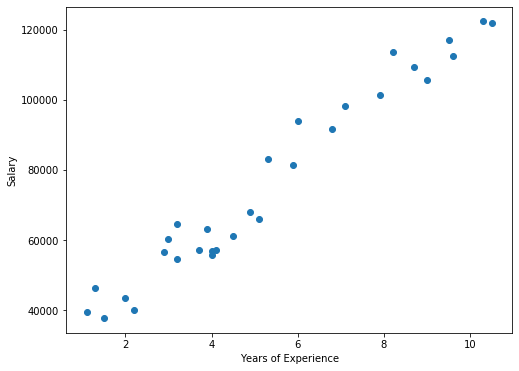

In [31]:
plt.figure(figsize=(8,6))
plt.scatter(X,Y)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

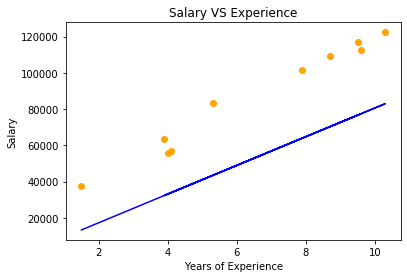

In [32]:
plt.scatter(X_test,Y_test, color='orange')
plt.plot(X_test,Y_pred,color='blue')
plt.title('Salary VS Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()